In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
### Nombre: Juan Sebastian Novoa Ortiz
### Documento: 1122922434
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

 tol     raiz        iter
1.0e-01    1.993610     4
1.0e-02    1.998720     5
1.0e-03    1.999949     7
1.0e-04    1.999990     8
1.0e-06    2.000000    11
1.0e-08    2.000000    14


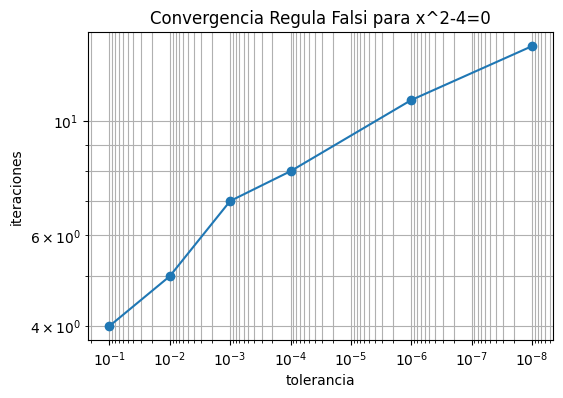

In [3]:
f = lambda x: x**2 - 4

def regula_falsi(f, a, b, tol, maxiter=100):
    """
    metodo de Regula Falsi para hallar raiz de f
    f       : funcion que recibe float y retorna float
    a, b    : extremos del intervalo inicial con f(a)*f(b)<0
    tol     : tolerancia en |f(c)|
    maxiter : numero maximo de iteraciones
    retorna : (c, niter) donde c es la raiz aproximada y
              niter el numero de iteraciones usadas
    """
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    for n in range(1, maxiter+1):
        # punto de interseccion de la secante
        c = (a*fb - b*fa) / (fb - fa)
        fc = f(c)
        # criterio de parada
        if abs(fc) < tol:
            return c, n
        # actualizacion de intervalo
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    # si no converge en maxiter
    return c, maxiter

# experimentos con diferentes tolerancias
tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-6, 1e-8]
resultados = []

# intervalo inicial que encierra la raiz
a0, b0 = 0.0, 3.0

for tol in tolerancias:
    raiz, pasos = regula_falsi(f, a0, b0, tol, maxiter=1000)
    resultados.append((tol, raiz, pasos))

# imprimir tabla de convergencia
print(" tol     raiz        iter")
for tol, raiz, pasos in resultados:
    print(f"{tol:7.1e}  {raiz:10.6f}   {pasos:3d}")

# graficar iteraciones vs tolerancia
tols = [r[0] for r in resultados]
iters = [r[2] for r in resultados]

plt.figure(figsize=(6,4))
plt.loglog(tols, iters, 'o-')
plt.gca().invert_xaxis()
plt.xlabel('tolerancia')
plt.ylabel('iteraciones')
plt.title('Convergencia Regula Falsi para x^2-4=0')
plt.grid(True, which='both')
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

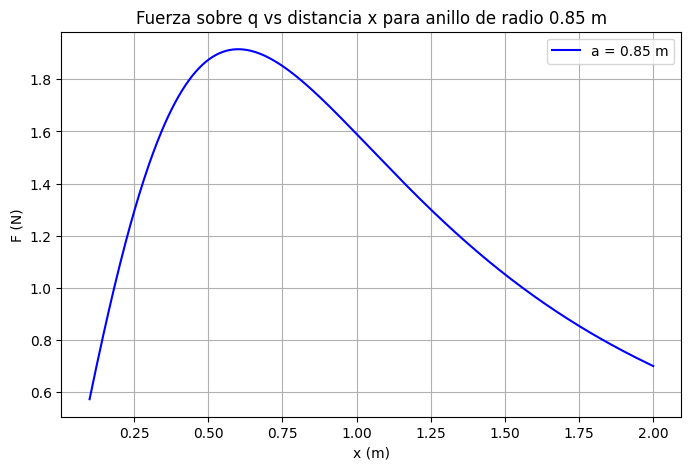

x para F=1.25 N (Newton) : 1.297399 m
x para F=1.25 N (Secante): 1.297399 m


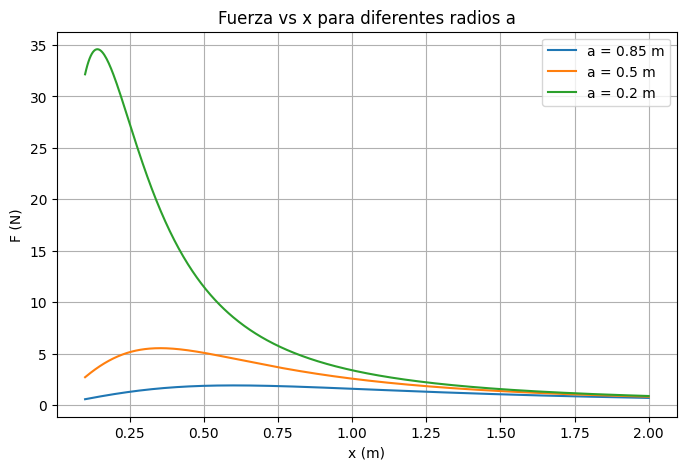

In [5]:
# constantes fisicas
eps0 = 8.854e-12               # permitividad del vacio [C^2/(N·m^2)]
k_c  = 1/(4*np.pi*eps0)       # constante electrostatica [N·m^2/C^2]
q    = 2e-5                   # carga de prueba [C]
Q    = 2e-5                   # carga del anillo [C]

# fuerza electrostatica de anillo sobre q
# a : radio del anillo [m]
# x : distancia horizontal desde centro del anillo [m]
F = lambda a, x: k_c * q * Q * x / ( (x**2 + a**2)**1.5 )

# grafica F(x) para a = 0.85 m y 0.1 <= x <= 2.0 m
a0     = 0.85
x_vals = np.linspace(0.1, 2.0, 500)
F_vals = F(a0, x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, F_vals, 'b-', label=f'a = {a0} m')
plt.xlabel('x (m)')
plt.ylabel('F (N)')
plt.title('Fuerza sobre q vs distancia x para anillo de radio 0.85 m')
plt.legend()
plt.grid(True)
plt.show()

# resolver x tal que F(a0,x) = 1.25 N
F_eq    = lambda x: F(a0, x) - 1.25
x_guess = 1.0

# metodo de Newton-Raphson
x_newton = newton(F_eq, x_guess, tol=1e-6, maxiter=50)

# metodo de la secante
x_secant = root_scalar(F_eq,
                       x0=0.5, x1=1.5,
                       method='secant',
                       xtol=1e-6).root

print(f"x para F=1.25 N (Newton) : {x_newton:.6f} m")
print(f"x para F=1.25 N (Secante): {x_secant:.6f} m")

# efecto de disminuir radio: grafica F(x) para varios radios
a_list = [0.85, 0.5, 0.2]  # radios en m
plt.figure(figsize=(8,5))
for a in a_list:
    plt.plot(x_vals, F(a, x_vals), label=f'a = {a} m')
plt.xlabel('x (m)')
plt.ylabel('F (N)')
plt.title('Fuerza vs x para diferentes radios a')
plt.legend()
plt.grid(True)
plt.show()

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



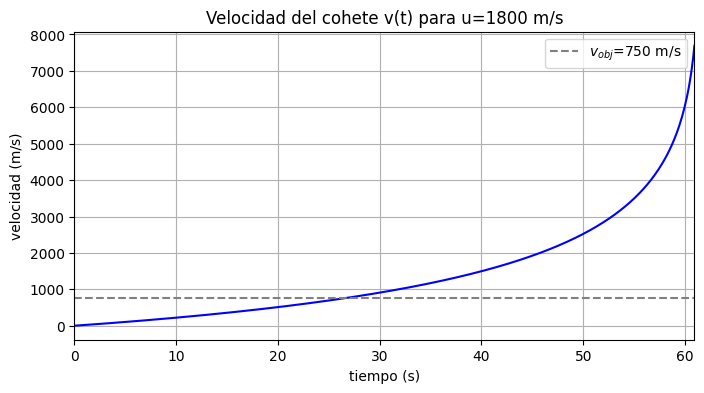

Resultados para u=1800 m/s:
tiempo (Biseccion)      = 26.40784849 s
tiempo (Newton-Raphson) = 26.40784796 s
tiempo (Regula-Falsi)   = 26.40180066 s


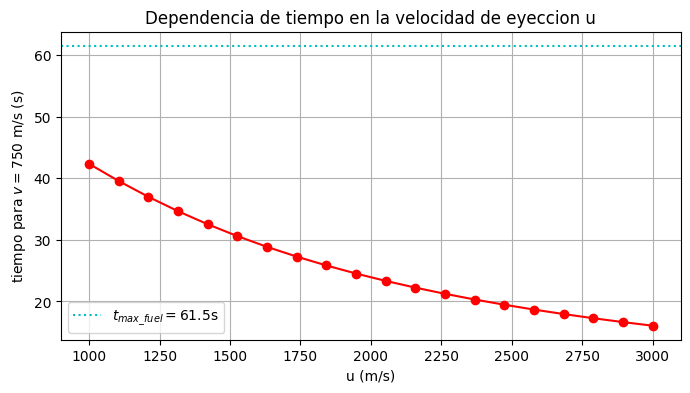

In [12]:
# constantes del problema
masa_inicial    = 1.6e5    # masa inicial del cohete [kg]
tasa_consumo    = 2600     # tasa de consumo de combustible [kg/s]
gravedad        = 9.81     # aceleracion de la gravedad [m/s^2]
velocidad_objetivo = 750      # velocidad objetivo [m/s]

# tiempo maximo de combustion (masa_inicial/tasa_consumo)
# se asume que el tiempo 't' siempre sera menor que este valor en las operaciones
tiempo_max_combustion = masa_inicial / tasa_consumo

def calcular_velocidad_cohete(tiempo, velocidad_eyeccion):
    """
    velocidad del cohete en funcion del tiempo
    tiempo : tiempo [s] o array de tiempos
    velocidad_eyeccion : velocidad de eyeccion [m/s]
    retorna: v = velocidad_eyeccion*ln(masa_inicial/(masa_inicial - tasa_consumo*tiempo)) - gravedad*tiempo.
    """
    masa_restante_calculada = masa_inicial - tasa_consumo * tiempo
    return velocidad_eyeccion * np.log(masa_inicial / masa_restante_calculada) - gravedad * tiempo

def calcular_derivada_velocidad(tiempo, velocidad_eyeccion):
    """
    derivada de velocidad_cohete con respecto al tiempo
    tiempo : tiempo [s] o array de tiempos
    velocidad_eyeccion : velocidad de eyeccion [m/s]
    retorna: dv/dt.
    """
    masa_restante_calculada = masa_inicial - tasa_consumo * tiempo
    return velocidad_eyeccion * tasa_consumo / masa_restante_calculada - gravedad

def funcion_para_raiz_tiempo(tiempo, velocidad_eyeccion):
    """
    funcion para hallar raiz: calcular_velocidad_cohete(tiempo,velocidad_eyeccion) - velocidad_objetivo
    tiempo : tiempo [s]
    velocidad_eyeccion : velocidad de eyeccion [m/s]
    retorna: diferencia v(tiempo)-velocidad_objetivo.
    """
    velocidad_actual_cohete = calcular_velocidad_cohete(tiempo, velocidad_eyeccion)
    return velocidad_actual_cohete - velocidad_objetivo

def regula_falsi(funcion_eval, a, b, tolerancia=1e-6, max_iteraciones=100):
    """
    metodo de Regula Falsi para hallar raiz de funcion_eval en [a,b]
    funcion_eval    : funcion que recibe float y retorna float
    a, b            : extremos del intervalo inicial con funcion_eval(a)*funcion_eval(b)<0
    tolerancia      : tolerancia en |funcion_eval(c)|
    max_iteraciones : numero maximo de iteraciones
    retorna         : (c, n_iter) donde c es la raiz aproximada y
                      n_iter el numero de iteraciones usadas
    """
    fa = funcion_eval(a)
    fb = funcion_eval(b)
    # se verifica que f(a) y f(b) tengan signos opuestos
    if fa * fb > 0:
        # si esta condicion se cumple, el programa se detendra aqui
        raise ValueError("f(a) y f(b) deben tener signos opuestos")

    for n_iter in range(1, max_iteraciones + 1):
        # punto de interseccion de la secante
        c  = (a * fb - b * fa) / (fb - fa)
        fc = funcion_eval(c)

        # criterio de parada
        if abs(fc) < tolerancia:
            return c, n_iter

        # actualizacion de intervalo
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    # si no converge en max_iteraciones
    return c, max_iteraciones

# ------------------------------------------------------
# 1) Grafica v(t) para u=1800 m/s
# ------------------------------------------------------
u_constante = 1800                  # velocidad de eyeccion [m/s]
tiempo_max_grafica = tiempo_max_combustion * 0.99
valores_tiempo_graf = np.linspace(1e-6, tiempo_max_grafica, 500)
valores_velocidad_graf = calcular_velocidad_cohete(valores_tiempo_graf, u_constante)

plt.figure(figsize=(8,4))
plt.plot(valores_tiempo_graf, valores_velocidad_graf, 'b-')
plt.axhline(velocidad_objetivo, color='gray', linestyle='--', label=f'$v_{{obj}}$={velocidad_objetivo} m/s')
plt.xlabel('tiempo (s)')
plt.ylabel('velocidad (m/s)')
plt.title(f'Velocidad del cohete v(t) para u={u_constante} m/s')
plt.legend()
plt.grid(True)
plt.xlim(0, tiempo_max_grafica)
plt.show()

# ------------------------------------------------------
# 2) Encontrar t tal que v(t)=750 m/s
# ------------------------------------------------------
lim_inf_busqueda = 1e-3
lim_sup_busqueda = tiempo_max_combustion - 1e-3

# Biseccion
# se asume que el intervalo es valido y root_scalar convergera
resultado_biseccion = root_scalar(
    lambda t_param: funcion_para_raiz_tiempo(t_param, u_constante),
    bracket=(lim_inf_busqueda, lim_sup_busqueda),
    method='bisect',
    xtol=1e-6
)
tiempo_biseccion = resultado_biseccion.root

# Regula Falsi
# se asume que el intervalo es valido y regula_falsi convergera
# la propia funcion regula_falsi verificara si f(a)*f(b) > 0 y lanzara error si es asi
raiz_rf, _ = regula_falsi(
    lambda t_param: funcion_para_raiz_tiempo(t_param, u_constante),
    lim_inf_busqueda,
    lim_sup_busqueda,
    tolerancia=1e-6
)
tiempo_regula_falsi = raiz_rf

# Newton-Raphson
# se elige una semilla, idealmente cerca de la raiz
semilla_tiempo_newton = tiempo_biseccion # se asume que tiempo_biseccion es una buena semilla
# se asume que newton convergera
tiempo_newton = newton(
    lambda t_param: funcion_para_raiz_tiempo(t_param, u_constante),
    semilla_tiempo_newton,
    fprime=lambda t_param: calcular_derivada_velocidad(t_param, u_constante),
    tol=1e-6,
    maxiter=100
)

print(f"Resultados para u={u_constante} m/s:")
print(f"tiempo (Biseccion)      = {tiempo_biseccion:.8f} s")
print(f"tiempo (Newton-Raphson) = {tiempo_newton:.8f} s")
print(f"tiempo (Regula-Falsi)   = {tiempo_regula_falsi:.8f} s")

# ------------------------------------------------------
# 3) Barrido de u entre 1000 y 3000 m/s y calculo de t
# ------------------------------------------------------
valores_u_barrido = np.linspace(1000, 3000, 20)
tiempos_soluciones_u = []

tiempo_solucion_anterior = tiempo_biseccion # se usa la solucion de biseccion como semilla inicial

for u_actual_barrido in valores_u_barrido:
    semilla_actual_tiempo = tiempo_solucion_anterior
    # se resetea la semilla si la anterior no fue valida (ej. de un u anterior donde no hubo convergencia)
    # o si es la primera iteracion y tiempo_biseccion fue NaN (aunque asumimos que no lo sera)
    if not (0 < semilla_actual_tiempo < tiempo_max_combustion):
        semilla_actual_tiempo = (lim_inf_busqueda + lim_sup_busqueda) / 2.0

    # se asume que Newton siempre encontrara una raiz valida y convergente
    tiempo_calculado_para_u = newton(
        lambda t_param: funcion_para_raiz_tiempo(t_param, u_actual_barrido),
        semilla_actual_tiempo,
        fprime=lambda t_param: calcular_derivada_velocidad(t_param, u_actual_barrido),
        tol=1e-6,
        maxiter=100
    )
    tiempos_soluciones_u.append(tiempo_calculado_para_u)
    tiempo_solucion_anterior = tiempo_calculado_para_u # se usa la solucion actual como semilla para la proxima u

valores_u_para_grafica = np.array(valores_u_barrido)
tiempos_u_para_grafica = np.array(tiempos_soluciones_u)
# aunque confiamos en el codigo, un NaN podria aparecer por limites de flotantes o casos extremos no previstos
# por lo que mantener el filtro para graficar es una pequeña salvaguarda visual.
mascara_tiempos_u_validos = ~np.isnan(tiempos_u_para_grafica)

# Grafico de tiempos vs u

plt.figure(figsize=(8,4))
plt.plot(valores_u_para_grafica[mascara_tiempos_u_validos], tiempos_u_para_grafica[mascara_tiempos_u_validos], 'ro-')
plt.xlabel('u (m/s)')
plt.ylabel(f'tiempo para $v={{{velocidad_objetivo}}}$ m/s (s)')
plt.title('Dependencia de tiempo en la velocidad de eyeccion u')
plt.grid(True)
plt.axhline(tiempo_max_combustion, color='c', linestyle=':', label=f'$t_{{max\\_fuel}}={tiempo_max_combustion:.1f}$s')
plt.legend()
plt.show()
